# Method 4

In [39]:
import numpy as np
from scipy.io import wavfile
import librosa
import matplotlib.pyplot as ployt
import pylab
import IPython.display as ipd
from glob import glob
import os
import pickle
import csv
import tensorflow
import librosa.display
import pandas as pd

In [28]:
largeDataset = pd.read_csv('peru_large_dataset.csv')
goodCode = ['AM-1', 'AM-2', 'AM-22', 'AM-24', 'AM-25', 'AM-26', 'AM-27', 'AM-29', 'AM-30', 'AM-6']
largeDataset = largeDataset[largeDataset['AudioMothCode'].isin(goodCode)]
largeDataset = largeDataset[largeDataset['Global_Score'] > 0.5]

F:\Aanacondo\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [29]:
goodCode = ['AM-1', 'AM-2', 'AM-22', 'AM-24', 'AM-25', 'AM-26', 'AM-27', 'AM-29', 'AM-30', 'AM-6']
largeDataset = largeDataset[largeDataset['AudioMothCode'].isin(goodCode)]
largeDataset['StartDateTime']= pd.to_datetime(largeDataset['StartDateTime'])
largeDataset['StartDateTime'] = largeDataset['StartDateTime'].dt.hour

In [30]:
time_df = largeDataset["StartDateTime"]
scores_df = largeDataset["Global_Score"]

In [31]:
time_list = time_df.to_list()
time_list = list(dict.fromkeys(time_list))

(0.0, 24.0)

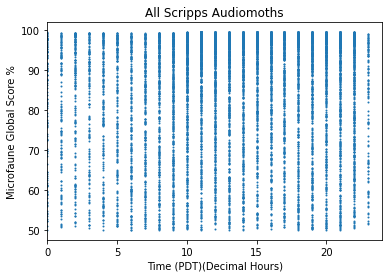

In [32]:
plot.scatter(time_df,scores_df*100,s=1)
plot.xlabel("Time (PDT)(Decimal Hours)")
plot.ylabel("Microfaune Global Score %")
plot.title("All Scripps Audiomoths")
plot.xlim(0,24)
#plot.savefig("All_Audiomoths_Scatterplot.png")

In [33]:
time_list.sort()
averaged_score_list = []
for time in time_list:
    relevant_rows = largeDataset[largeDataset["StartDateTime"] == time]
    scores = relevant_rows["Global_Score"].to_numpy()
    average_score = np.mean(scores)*100
    averaged_score_list.append(average_score)

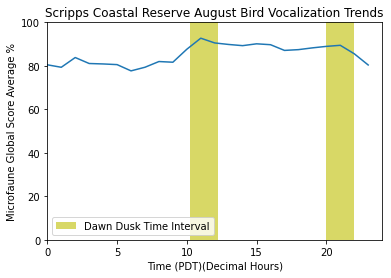

In [34]:
plot.plot(time_list,averaged_score_list)
plot.xlabel("Time (PDT)(Decimal Hours)")
plot.ylabel("Microfaune Global Score Average %")
plot.title("Scripps Coastal Reserve August Bird Vocalization Trends")
plot.ylim(0,100)
plot.xlim(0,24)
plot.axvspan(10.2,12.2,facecolor='y',alpha=0.6)
plot.axvspan(20.0,22.0,facecolor='y',alpha=0.6, label = "Dawn Dusk Time Interval")
plot.legend(loc="lower left")

In [35]:
dawn = largeDataset[((largeDataset['StartDateTime'] >= 10) & (largeDataset['StartDateTime'] <= 12))].dropna(subset = ['FileName'])
dusk = largeDataset[((largeDataset['StartDateTime'] >= 20) & (largeDataset['StartDateTime'] <= 22))].dropna(subset = ['FileName'])

In [36]:
dawn = dawn.sample(120)
dusk = dusk.sample(120)

In [37]:
result = pd.concat([dawn,dusk])
result.to_csv('method4.csv')

In [38]:
fileNames = result['FileName'].tolist()
fileNames

['20190704_114000.WAV',
 '20190629_114000.WAV',
 '20190705_111000.WAV',
 '20190624_110000.WAV',
 '20190618_114000.WAV',
 '20190618_123000.WAV',
 '20190703_104000.WAV',
 '20190616_113000.WAV',
 '20190622_121000.WAV',
 '20190629_111000.WAV',
 '20190627_110000.WAV',
 '20190710_112000.WAV',
 '20190622_100000.WAV',
 '20190617_105000.WAV',
 '20190624_101000.WAV',
 '20190627_113000.WAV',
 '20190630_123000.WAV',
 '20190629_102000.WAV',
 '20190703_111000.WAV',
 '20190627_102000.WAV',
 '20190624_105000.WAV',
 '20190619_114000.WAV',
 '20190624_100000.WAV',
 '20190627_112000.WAV',
 '20190625_122000.WAV',
 '20190627_115000.WAV',
 '20190625_113000.WAV',
 '20190629_104000.WAV',
 '20190623_113000.WAV',
 '20190618_124000.WAV',
 '20190703_100000.WAV',
 '20190702_121000.WAV',
 '20190622_115000.WAV',
 '20190622_121000.WAV',
 '20190702_123000.WAV',
 '20190702_100000.WAV',
 '20190710_113000.WAV',
 '20190625_105000.WAV',
 '20190702_125000.WAV',
 '20190623_103000.WAV',
 '20190619_100000.WAV',
 '20190627_10400